In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#open the csv as a dataframe
df=pd.read_csv('youtube.csv',index_col=0)
df

,video_id,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
index,,,,,,,,,,,,,,,,,
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,13/11/2017,17:00 to 17:59,Monday,US,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,13/11/2017,7:00 to 7:59,Monday,US,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,12/11/2017,19:00 to 19:59,Sunday,US,"racist superman|""rudy""""|""""mancuso""""|""""king""""|""...",3191434,146033,5339,8181,False,False,False
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,13/11/2017,11:00 to 11:59,Monday,US,"rhett and link|""gmm""""|""""good mythical morning""...",343168,10172,666,2146,False,False,False
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,12/11/2017,18:00 to 18:59,Sunday,US,"ryan|""higa""""|""""higatv""""|""""nigahiga""""|""""i dare ...",2095731,132235,1989,17518,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161465,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,13/06/2018,18:00 to 18:59,Wednesday,CANADA,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,False,False,False
161466,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,13/06/2018,19:00 to 19:59,Wednesday,CANADA,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,False,False,False
161467,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III â€“ SQUARE ENIX E3 SHOWCASE...,Kingdom Hearts,20,11/06/2018,17:00 to 17:59,Monday,CANADA,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,False,False,False


In [3]:
df['start_time'] = pd.to_datetime(df['publish_date'])
df['end_time'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['trending_duration'] = (df['end_time'] - df['start_time']).dt.total_seconds()/(86400)
trending_days_df = df[['video_id', 'trending_duration']].copy()
videos_trending_more_than_24_hours = trending_days_df[trending_days_df['trending_duration'] > 1]
more_than_24_hours = len(videos_trending_more_than_24_hours)
trending_days_df



C:\Users\singa\AppData\Local\Temp\ipykernel_10208\1782574853.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['start_time'] = pd.to_datetime(df['publish_date'])


,video_id,trending_duration
index,,
0,2kyS6SvSYSE,1.0
1,1ZAPwfrtAFY,1.0
2,5qpjK5DgCt4,2.0
3,puqaWrEC7tY,1.0
4,d380meD0W0M,2.0
...,...,...
161465,sGolxsMSGfQ,1.0
161466,8HNuRNi8t70,1.0
161467,GWlKEM3m2EE,3.0


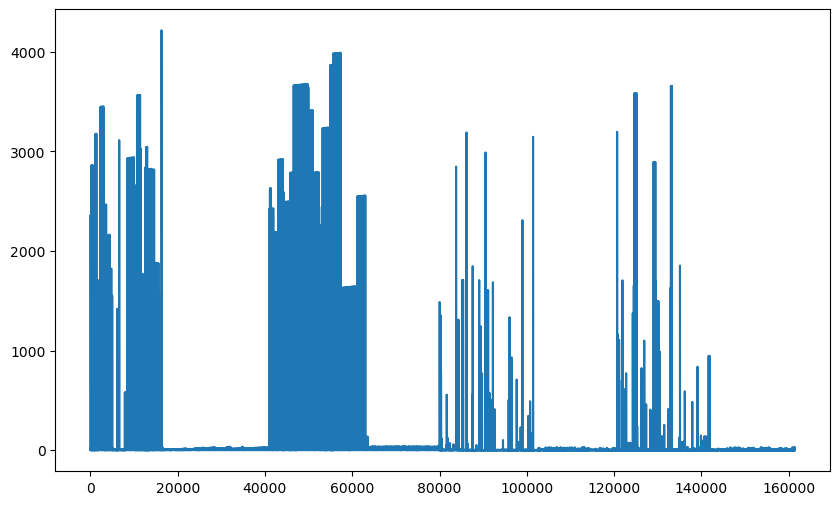

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(trending_days_df.index, trending_days_df['trending_duration'])
plt.show()

In [5]:
#print the result for part 2

print(f'Number of videos trending for less than 24 hours: {161470-more_than_24_hours}')

Number of videos trending for less than 24 hours: 54477


In [6]:
#print the result for part 3
df['publish_country'].value_counts().head(1)


publish_country
US    40949
Name: count, dtype: int64